<a href="https://colab.research.google.com/github/jaimeisaac2020/Python-analsisis-basicos/blob/mi-github/pca1python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El análisis de componentes principales (PCA) es una técnica utilizada para reducir la dimensionalidad de los datos, conservando al mismo tiempo la mayor cantidad posible de su variabilidad. Aquí hay un análisis de componentes principales detallado en Python utilizando la base de datos proporcionada:

```python
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Datos proporcionados
data = {
    'Departamento': ['Amazonas', 'Ancash', 'Apurímac', 'Arequipa', 'Ayacucho', 'Cajamarca', 'Callao', 'Cusco', 'Huancavelica', 'Huánuco', 'Ica', 'Junín', 'La Libertad', 'Lambayeque', 'Lima', 'Loreto', 'Madre de Dios', 'Moquegua', 'Pasco', 'Piura', 'Puno', 'San Martín', 'Tacna', 'Tumbes', 'Ucayali'],
    'X1': [290, 9018, 3049, 11243, 7143, 15355, 14730, 13461, 3004, 5648, 6610, 10129, 13497, 12383, 152282, 12332, 2527, 3384, 3667, 14853, 9489, 8542, 3984, 2273, 6865],
    'X2': [1, 3, 2, 0, 2, 6, 22, 8, 2, 2, 16, 0, 3, 2, 457, 5, 0, 0, 2, 3, 10, 5, 4, 1, 11],
    'X3': [2571, 6920, 1779, 13390, 2639, 9930, 12728, 7633, 993, 5174, 5754, 7513, 17844, 12275, 161532, 8877, 985, 1194, 1639, 13471, 4748, 9313, 3493, 1719, 4341],
    'X4': [1737, 9904, 1431, 17503, 3134, 7112, 18562, 9197, 1147, 3719, 6960, 11101, 15268, 11665, 171936, 5805, 1582, 1539, 1555, 14736, 5650, 4249, 3246, 2653, 3859],
    'X8': [1623, 15625, 1808, 28868, 4166, 7346, 37432, 14619, 1527, 4339, 14696, 16157, 26781, 14204, 358287, 8683, 1382, 3587, 3015, 24301, 7710, 5512, 5909, 3110, 6000],
    'X18': [181, 4937, 2062, 18404, 4963, 6572, 1163, 2900, 4389, 2040, 4751, 8956, 12637, 784, 21132, 1252, 5147, 2454, 8565, 3856, 15214, 115, 821, 85, 326],
    'X20': [76285, 102156, 54696, 76675, 87986, 242243, 3041, 157743, 82900, 126288, 62033, 161463, 138395, 77638, 137829, 106634, 8397, 12621, 38114, 158286, 210615, 150129, 18781, 11236, 40309]
}

df = pd.DataFrame(data)

# Separar las variables independientes (X) y la etiqueta (Departamento)
X = df.drop(['Departamento'], axis=1)

# Estandarizar los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Variabilidad explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Graficar la variabilidad explicada acumulativa
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Variabilidad Explicada Acumulativa')
plt.title('Análisis de Componentes Principales')
plt.show()

# Elegir el número de componentes principales
num_components = 2  # Puedes ajustar este número según el gráfico anterior

# Reducir las dimensiones
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_std)

# Crear un nuevo DataFrame con los componentes principales
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(num_components)])
df_pca['Departamento'] = df['Departamento']

# Mostrar el DataFrame con los componentes principales
print("DataFrame con Componentes Principales:")
print(df_pca)

# Mostrar la variabilidad explicada por cada componente principal
print("\nVariabilidad Explicada por Componente Principal:")
for i in range(num_components):
    print(f"PC{i+1}: {explained_variance_ratio[i]:.4f}")

# Análisis de las cargas de variables
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(data=loadings, columns=[f'PC{i+1}' for i in range(num_components)], index=X.columns)
print("\nCargas de Variables:")
print(loadings_df)
```

Este código realiza un análisis de componentes principales (PCA) en los datos proporcionados. Reduzco las dimensiones a dos componentes principales y muestro la variabilidad explicada y las cargas de las variables en cada componente principal. Puedes ajustar el número de componentes principales según tus necesidades y analizar el significado de cada componente principal en el contexto de tus datos.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [4]:
data=pd.read_csv('pca1.csv',delimiter=';',
                 encoding='latin1')
data.head()

,departamento,X1,X2,X3,X4,X8,X18,X20
0,Amazonas,290,1,2571,1737,1623,181,76285
1,Ancash,9018,3,6920,9904,15625,4937,102156
2,Apurímac,3049,2,1779,1431,1808,2062,54696
3,Arequipa,11243,0,13390,17503,28868,18404,76675
4,Ayacucho,7143,2,2639,3134,4166,4963,87986


In [6]:
df=pd.DataFrame(data)

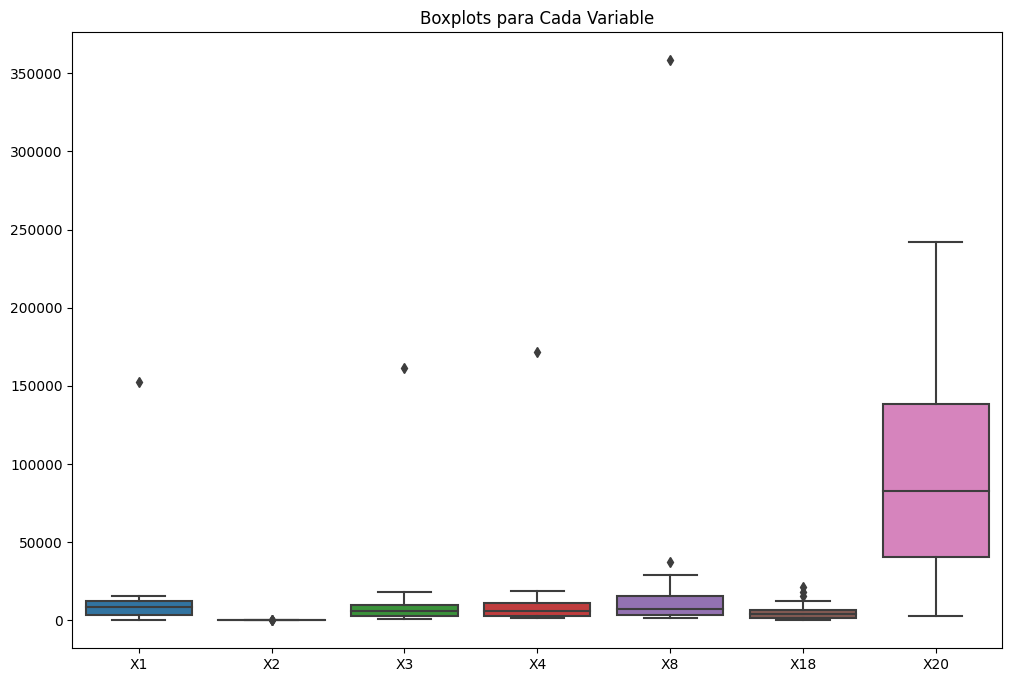

Departamentos con Outliers:
3     Arequipa
6       Callao
10         Ica
14        Lima
20        Puno
Name: departamento, dtype: object


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Datos

# Seleccionar solo las columnas numéricas
numeric_columns = df.drop(['departamento'], axis=1)

# Crear un boxplot para cada columna numérica
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_columns)
plt.title('Boxplots para Cada Variable')
plt.show()

# Calcular el rango intercuartílico (IQR)
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers
outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)

# Mostrar los departamentos que tienen outliers
print("Departamentos con Outliers:")
print(df[outliers]['departamento'])


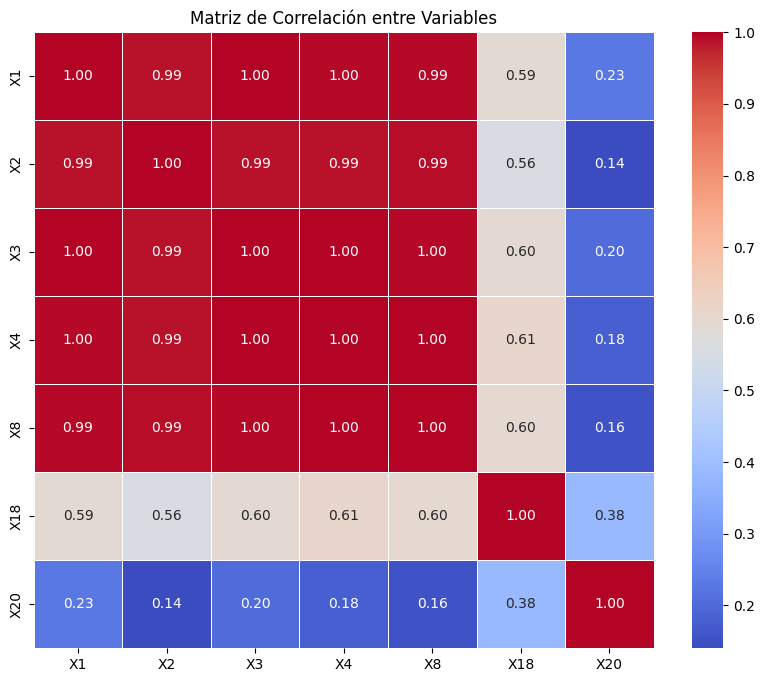

In [24]:
import seaborn as sns

# Seleccionar solo las columnas numéricas
numeric_columns = df.drop(['departamento'], axis=1)

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()


In [27]:
from scipy.stats import bartlett

# Seleccionar solo las columnas numéricas


# Realizar la prueba de esfericidad de Barlett
statistic, p_value = bartlett(*numeric_columns.T.values)

# Imprimir el resultado de la prueba
print(f"Estadístico de Barlett: {statistic}")
print(f"P-valor: {p_value}")

# Comparar con un nivel de significancia
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay evidencia para sugerir que la matriz de covarianza no es una matriz de identidad.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. La matriz de covarianza podría ser una matriz de identidad.")


Estadístico de Barlett: 377.1755721590238
P-valor: 2.248888628201291e-78
Se rechaza la hipótesis nula. Hay evidencia para sugerir que la matriz de covarianza no es una matriz de identidad.


In [29]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 33.4 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=5cf1bf98c0de3d5b5d2f28a51148abe8c83f9e2aa73f4a077cc7085ffdad73f0
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [30]:
from factor_analyzer.factor_analyzer import calculate_kmo

# Seleccionar solo las columnas numéricas
#numeric_columns = df.drop(['Departamento'], axis=1)

# Calcular el KMO
kmo_all, kmo_model = calculate_kmo(numeric_columns)

# Imprimir los resultados
print(f"KMO global: {kmo_model}")

# Interpretar el resultado
if kmo_model > 0.8:
    print("El KMO indica que la matriz de correlación es adecuada para el análisis de factores.")
else:
    print("El KMO sugiere que la matriz de correlación puede no ser adecuada para el análisis de factores.")


KMO global: 0.779604443685345
El KMO sugiere que la matriz de correlación puede no ser adecuada para el análisis de factores.


In [10]:
# Separar las variables independientes (X) y la etiqueta (Departamento)
X = df.drop(['departamento'], axis=1)


In [11]:
# Estandarizar los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [12]:
# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)


In [13]:
# Variabilidad explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_


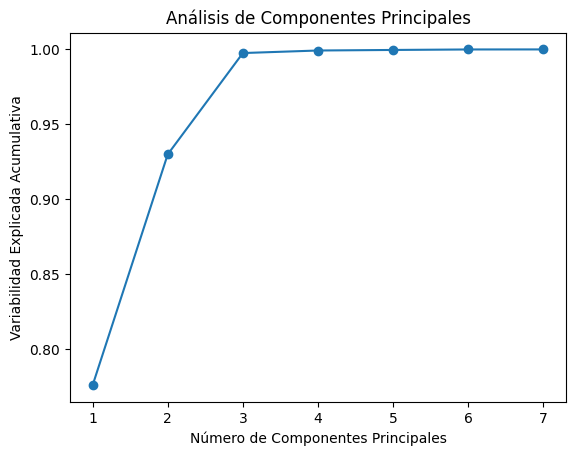

In [14]:
# Graficar la variabilidad explicada acumulativa
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Variabilidad Explicada Acumulativa')
plt.title('Análisis de Componentes Principales')
plt.show()

In [16]:
# Elegir el número de componentes principales
num_components = 3  # Puedes ajustar este número según el gráfico anterior

# Reducir las dimensiones
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_std)


In [18]:
# Crear un nuevo DataFrame con los componentes principales
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(num_components)])
df_pca['departamento'] = df['departamento']


In [19]:
df_pca

,PC1,PC2,PC3,departamento
0,-1.034547,-0.443804,-0.483751,Amazonas
1,-0.353055,0.173367,-0.040768,Ancash
2,-0.944383,-0.611123,-0.056608,Apurímac
3,0.580596,0.730646,2.115284,Arequipa
4,-0.627534,0.037830,0.111763,Ayacucho
5,0.040760,2.223037,-0.839042,Cajamarca
6,-0.218449,-1.594224,0.001785,Callao
7,-0.274916,0.777963,-0.776612,Cusco
8,-0.792441,-0.049602,0.093569,Huancavelica
9,-0.687993,0.350030,-0.606914,Huánuco


In [20]:
# Mostrar el DataFrame con los componentes principales
print("DataFrame con Componentes Principales:")
print(df_pca)

DataFrame con Componentes Principales:
          PC1       PC2       PC3   departamento
0   -1.034547 -0.443804 -0.483751       Amazonas
1   -0.353055  0.173367 -0.040768         Ancash
2   -0.944383 -0.611123 -0.056608       Apurímac
3    0.580596  0.730646  2.115284       Arequipa
4   -0.627534  0.037830  0.111763       Ayacucho
5    0.040760  2.223037 -0.839042      Cajamarca
6   -0.218449 -1.594224  0.001785         Callao
7   -0.274916  0.777963 -0.776612          Cusco
8   -0.792441 -0.049602  0.093569   Huancavelica
9   -0.687993  0.350030 -0.606914        Huánuco
10  -0.467837 -0.397219  0.225849            Ica
11  -0.013197  1.279729  0.129660          Junín
12   0.461861  1.154829  0.778050    La Libertad
13  -0.475313 -0.488846 -0.524116     Lambayeque
14  11.188352 -0.763287 -0.235080           Lima
15  -0.544080 -0.022435 -0.639907         Loreto
16  -0.897111 -1.020864  0.749370  Madre de Dios
17  -0.998800 -1.163402  0.307282       Moquegua
18  -0.624406 -0.373663  1.037

In [21]:
# Mostrar la variabilidad explicada por cada componente principal
print("\nVariabilidad Explicada por Componente Principal:")
for i in range(num_components):
    print(f"PC{i+1}: {explained_variance_ratio[i]:.4f}")



Variabilidad Explicada por Componente Principal:
PC1: 0.7758
PC2: 0.1542
PC3: 0.0676


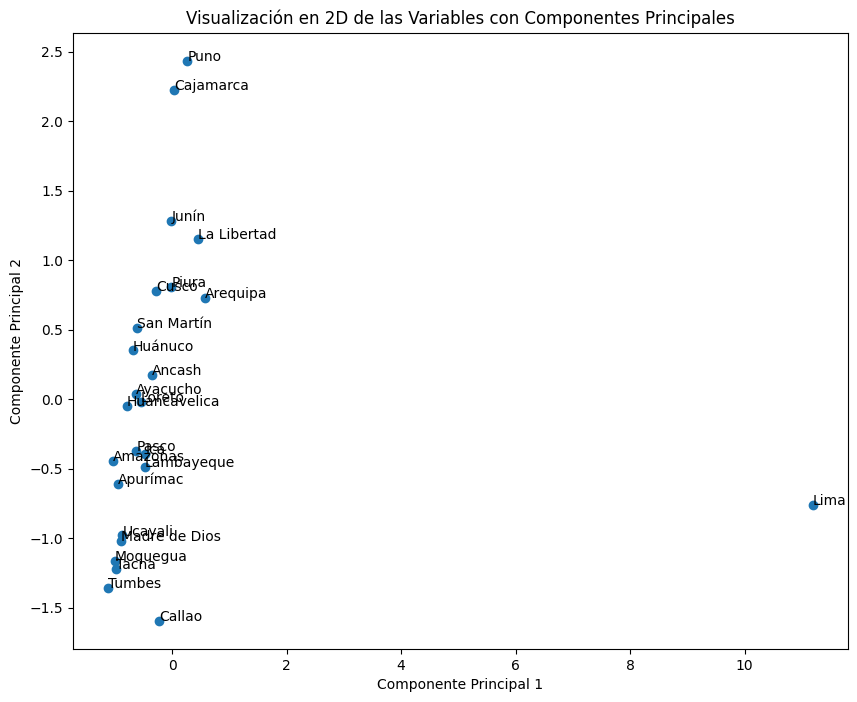

In [32]:
import matplotlib.pyplot as plt

# Utilizar solo las dos primeras componentes principales
df_pca_2d = df_pca[['PC1', 'PC2']]

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 8))
plt.scatter(df_pca_2d['PC1'], df_pca_2d['PC2'])

# Etiquetar cada punto con el nombre del departamento
for i, departamento in enumerate(df['departamento']):
    plt.annotate(departamento, (df_pca_2d['PC1'][i], df_pca_2d['PC2'][i]))

# Agregar etiquetas y título al gráfico
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización en 2D de las Variables con Componentes Principales')

# Mostrar el gráfico
plt.show()


In [22]:
# Análisis de las cargas de variables
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(data=loadings, columns=[f'PC{i+1}' for i in range(num_components)], index=X.columns)
print("\nCargas de Variables:")
print(loadings_df)


Cargas de Variables:
          PC1       PC2       PC3
X1   1.012723 -0.066854 -0.097625
X2   1.000544 -0.158079 -0.079862
X3   1.012617 -0.089324 -0.074381
X4   1.013138 -0.105334 -0.041405
X8   1.011128 -0.129159 -0.038126
X18  0.696313  0.438239  0.603930
X20  0.266901  0.930992 -0.321964


Sí, los componentes principales (PC) se obtienen multiplicando la matriz de datos estandarizados por la matriz de cargas de los componentes principales. La fórmula general para obtener los componentes principales sería:

\[ PC_i = X \cdot \text{Loadings}_i \]

Donde:
- \( PC_i \) es el componente principal \(i\).
- \( X \) es la matriz de datos estandarizados.
- \( \text{Loadings}_i \) es el vector de cargas del componente principal \(i\).

La fórmula específica para cada componente principal es la siguiente:

\[ PC_i = X_1 \times \text{Loadings}_{1i} + X_2 \times \text{Loadings}_{2i} + \ldots + X_k \times \text{Loadings}_{ki} \]

Donde:
- \( X_j \) es el valor estandarizado de la variable \(j\).
- \( \text{Loadings}_{ji} \) es la carga de la variable \(j\) en el componente principal \(i\).

En el código anterior, `X_pca` contiene los componentes principales obtenidos, y las cargas de las variables en cada componente principal se almacenan en `loadings_df`. Puedes inspeccionar estos resultados para entender cómo cada variable contribuye a cada componente principal. La interpretación de los componentes principales implica entender las relaciones lineales entre las variables originales y los componentes principales, así como la magnitud de sus cargas.

Si deseas proyectar un nuevo individuo en el espacio de los componentes principales, puedes utilizar la misma transformación que aplicaste a los datos originales. Es decir, multiplicar el vector de características del nuevo individuo por la matriz de cargas de los componentes principales.

Aquí te dejo un ejemplo de cómo hacer esto en Python usando el código anterior:

```python
# Nuevo individuo (ejemplo, ajusta los valores según tus necesidades)
nuevo_individuo = np.array([5000, 5, 2000, 3000, 4000, 1000, 50000])

# Estandarizar los datos del nuevo individuo utilizando el mismo StandardScaler
nuevo_individuo_std = scaler.transform(nuevo_individuo.reshape(1, -1))

# Proyectar el nuevo individuo en el espacio de los componentes principales
nuevo_individuo_pca = pca.transform(nuevo_individuo_std)

# Crear un DataFrame para mostrar el resultado
df_nuevo_individuo_pca = pd.DataFrame(data=nuevo_individuo_pca, columns=[f'PC{i+1}' for i in range(num_components)])

print("Proyección del Nuevo Individuo en el Espacio de Componentes Principales:")
print(df_nuevo_individuo_pca)
```

En este ejemplo, `nuevo_individuo` es un vector con las características del nuevo individuo. Primero, estandarizamos estas características usando el mismo `StandardScaler` que utilizamos anteriormente para estandarizar los datos originales. Luego, utilizamos la función `transform` del objeto PCA (`pca`) para proyectar el nuevo individuo en el espacio de los componentes principales.

El resultado se muestra en un DataFrame llamado `df_nuevo_individuo_pca`, que contiene las coordenadas del nuevo individuo en cada uno de los componentes principales. Puedes interpretar estas coordenadas como las "contribuciones" del nuevo individuo a cada uno de los componentes principales.

In [23]:
# Nuevo individuo (ejemplo, ajusta los valores según tus necesidades)
nuevo_individuo = np.array([5000, 5, 2000, 3000, 4000, 1000, 50000])

# Estandarizar los datos del nuevo individuo utilizando el mismo StandardScaler
nuevo_individuo_std = scaler.transform(nuevo_individuo.reshape(1, -1))

# Proyectar el nuevo individuo en el espacio de los componentes principales
nuevo_individuo_pca = pca.transform(nuevo_individuo_std)

# Crear un DataFrame para mostrar el resultado
df_nuevo_individuo_pca = pd.DataFrame(data=nuevo_individuo_pca, columns=[f'PC{i+1}' for i in range(num_components)])

print("Proyección del Nuevo Individuo en el Espacio de Componentes Principales:")
print(df_nuevo_individuo_pca)


Proyección del Nuevo Individuo en el Espacio de Componentes Principales:
        PC1       PC2       PC3
0 -0.926797 -0.771357 -0.201103


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
# Definir umbrales para clasificar en las componentes principales
umbral_componente1 = 0  # Ajusta según tus necesidades
umbral_componente2 = 0  # Ajusta según tus necesidades
umbral_componente3 = 0
# Crear nuevas columnas en el DataFrame para indicar la pertenencia a las componentes
df['Pertenencia_Componente1'] = np.where(df_pca['PC1'] > umbral_componente1, 'Componente 1', 'No Componente 1')
df['Pertenencia_Componente2'] = np.where(df_pca['PC2'] > umbral_componente2, 'Componente 2', 'No Componente 2')
df['Pertenencia_Componente3'] = np.where(df_pca['PC3'] > umbral_componente3, 'Componente 3', 'No Componente 3')
# Mostrar la pertenencia a las componentes para cada departamento
print("Pertenencia a Componente 1:")
print(df[['departamento', 'Pertenencia_Componente1']])

print("\nPertenencia a Componente 2:")
print(df[['departamento', 'Pertenencia_Componente2']])

print("\nPertenencia a Componente 3:")
print(df[['departamento', 'Pertenencia_Componente3']])



Pertenencia a Componente 1:
     departamento Pertenencia_Componente1
0        Amazonas         No Componente 1
1          Ancash         No Componente 1
2        Apurímac         No Componente 1
3        Arequipa            Componente 1
4        Ayacucho         No Componente 1
5       Cajamarca            Componente 1
6          Callao         No Componente 1
7           Cusco         No Componente 1
8    Huancavelica         No Componente 1
9         Huánuco         No Componente 1
10            Ica         No Componente 1
11          Junín         No Componente 1
12    La Libertad            Componente 1
13     Lambayeque         No Componente 1
14           Lima            Componente 1
15         Loreto         No Componente 1
16  Madre de Dios         No Componente 1
17       Moquegua         No Componente 1
18          Pasco         No Componente 1
19          Piura         No Componente 1
20           Puno            Componente 1
21     San Martín         No Componente 1
22    